In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

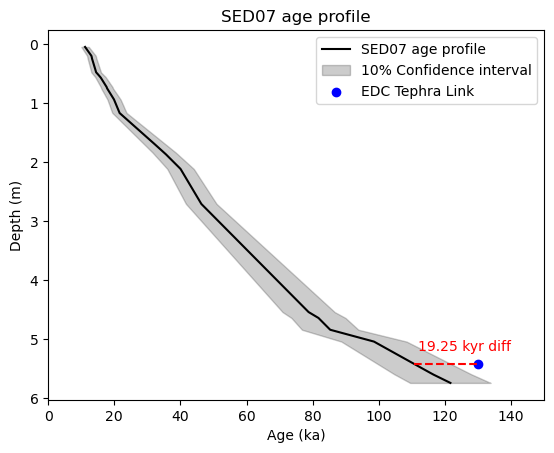

In [297]:
#plot for SED age profile and synchro horizons
sed_depth_age = "E:/GitHub/BICC/Paleochrono/SedProject/SED07 Analysis/age_horizons.txt"
sed_depth_age = pd.read_csv(sed_depth_age, comment="#", delimiter="\t", names=["depth (m)", "age (ka)", "uncertainty"])

synchro_horizons = "E:/GitHub/BICC/Paleochrono/SedProject/SED07 Analysis/synchro_horizons.txt"
synchro_horizons = pd.read_csv(synchro_horizons, comment="#", delimiter="\t", names=["depth (m)", "age (yr)", "uncertainty"])

EDC_depth = synchro_horizons['depth (m)'].values
EDC_age = synchro_horizons['age (yr)'].values
SED07_age = np.interp(EDC_depth, sed_depth_age['depth (m)'], sed_depth_age['age (ka)'])
diff_val = EDC_age-SED07_age
diff_val = diff_val[0]

xplotmax = 150

plt.plot(sed_depth_age["age (ka)"], sed_depth_age["depth (m)"], label="SED07 age profile", color="black")
plt.fill_betweenx(sed_depth_age["depth (m)"], 
                  sed_depth_age["age (ka)"] - 0.1 * sed_depth_age["age (ka)"], 
                  sed_depth_age["age (ka)"] + 0.1 * sed_depth_age["age (ka)"], 
                  color="black", alpha=0.2, label = "10% Confidence interval")
plt.scatter(synchro_horizons["age (yr)"], synchro_horizons["depth (m)"], label="EDC Tephra Link", color="blue")
plt.axhline(y=EDC_depth, xmin=(SED07_age/xplotmax), xmax=(EDC_age/xplotmax), color='red', linestyle='--')
plt.text(112, 5.2, f"{diff_val} kyr diff", color = 'red')
plt.title("SED07 age profile")
plt.gca().invert_yaxis()
plt.xlabel("Age (ka)")
plt.ylabel("Depth (m)")
plt.xlim(0, xplotmax)
plt.legend()

plt.savefig("E:/GitHub/BICC/Paleochrono/SedProject/Figs/SED07_age_profile.png", dpi=300)
plt.show()

            Name     Lat     Long
0          SED04 -67.617  -76.968
1          SED06 -67.277  -77.753
2          SED07 -67.488  -77.352
3          SED15 -66.983  -78.488
4            EDC -75.100  123.350
5  SED LOCATIONS -67.488  -77.352


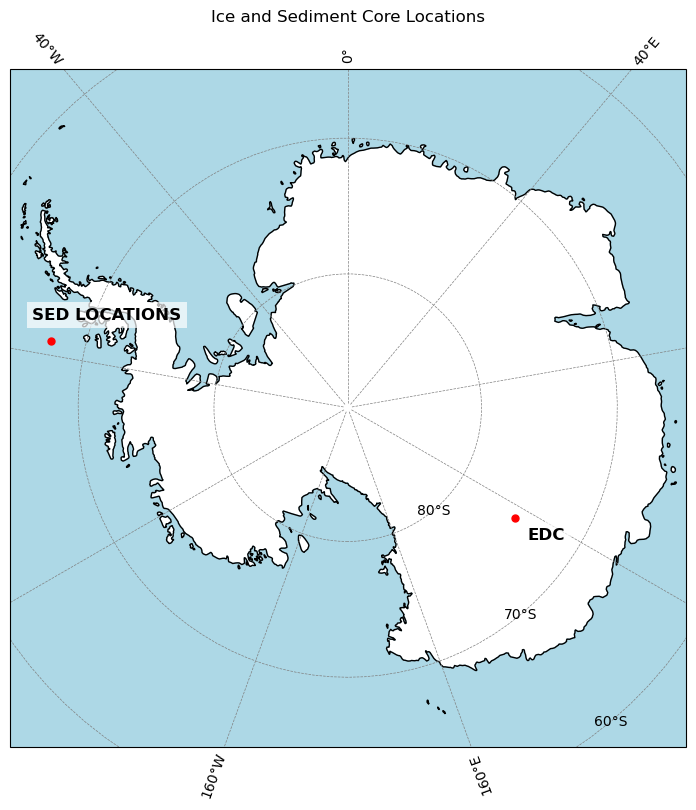

In [302]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_antarctica():
    fig, ax = plt.subplots(figsize=(8, 8),
                           subplot_kw={"projection": ccrs.SouthPolarStereo()})
    
    # Set the extent to show Antarctica
    ax.set_extent([-180, 180, -90, -65], crs=ccrs.PlateCarree())
    
    # Add land and ocean features
    ax.add_feature(cfeature.LAND, color='white')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, color='lightblue', edgecolor='black')
    
    # Gridlines for reference
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")    
    gl.xlabels_top = False  # Remove top longitude labels
    gl.xlabels_bottom = False  # Keep bottom longitude labels
    gl.ylabels_left = False  # Keep left latitude labels
    gl.ylabels_right = False  # Remove right latitude labels

    #change # of labels
    gl.xlocator = ticker.MaxNLocator(integer=True, prune='lower', nbins=9)  # More longitude labels
    gl.ylocator = ticker.MultipleLocator(10)  # More latitude labels

    # Input coordinates (example: you can modify this as needed)
    lat_long = "E:/GitHub/BICC/Paleochrono/SedProject/Figs/LatLongData.txt"
    lat_long = pd.read_csv(lat_long, comment="#", delimiter="\t", names=["Name", "Lat", "Long"])

    print(lat_long)

    for i in range(4,6): #pulling lat long data
        lat = lat_long["Lat"][i]
        lon = lat_long["Long"][i]
        name = lat_long["Name"][i]
        ax.plot(lon, lat, marker='o', ms=5, color='red', transform=ccrs.PlateCarree())  # Red dot at lat/lon
        i+=1
        ax.text(lon+3, lat+1.7, name, transform=ccrs.PlateCarree(), fontsize=12, color='black', 
            weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))  # Adjust the label position slightly for better readability
        
    plt.tight_layout()
    plt.title("Ice and Sediment Core Locations")

# Run the function to display the map
plot_antarctica()

plt.savefig("E:/GitHub/BICC/Paleochrono/SedProject/Figs/Antarctica_map.png", dpi=300)

            Name     Lat     Long
0          SED04 -67.617  -76.968
1          SED06 -67.277  -77.753
2          SED07 -67.488  -77.352
3          SED15 -66.983  -78.488
4            EDC -75.100  123.350
5  SED LOCATIONS -67.488  -77.352


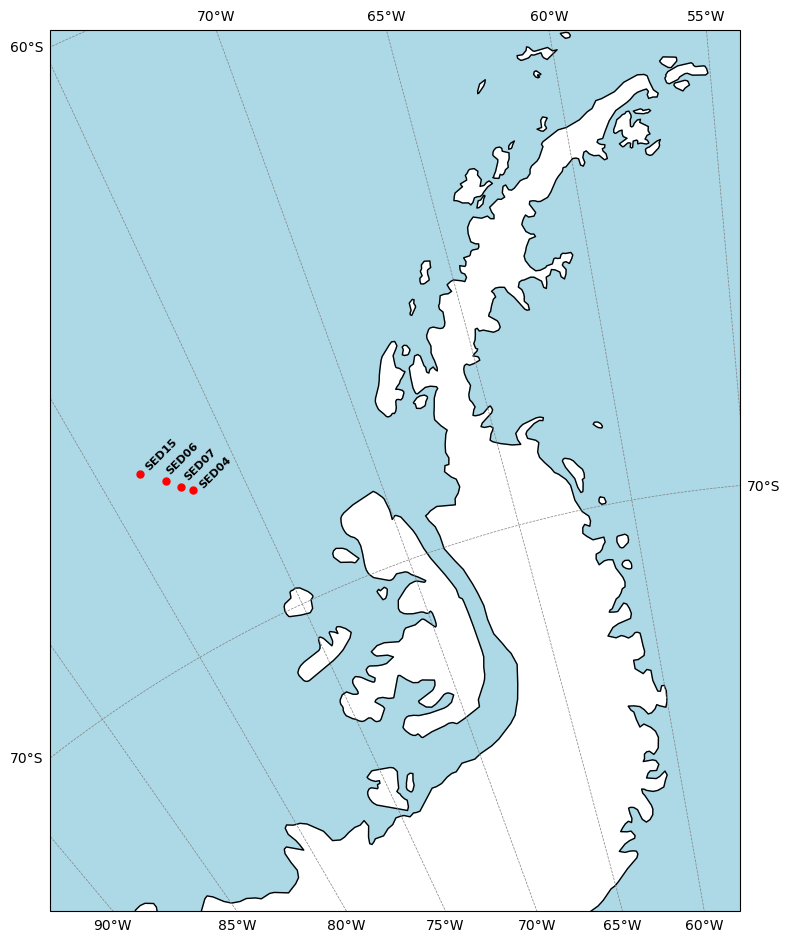

In [298]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_antarctica():
    fig, ax = plt.subplots(figsize=(8, 20), subplot_kw={"projection": ccrs.Orthographic(central_longitude=-50, central_latitude=-90)})
    
    # Set the extent to show Peninsula
    ax.set_extent([-77, -57, -75, -62.5], crs=ccrs.PlateCarree())
    
    # Add land and ocean features
    ax.add_feature(cfeature.LAND, color='white')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, color='lightblue', edgecolor='black')
    
    # Gridlines for reference
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray")    
    gl.xlabels_top = False  # Remove top longitude labels
    gl.xlabels_bottom = False  # Keep bottom longitude labels
    gl.ylabels_left = False  # Keep left latitude labels
    gl.ylabels_right = False  # Remove right latitude labels

    #change # of labels
    gl.xlocator = ticker.MaxNLocator(integer=True, prune='lower', nbins=9)  # More longitude labels
    gl.ylocator = ticker.MultipleLocator(10)  # More latitude labels

    # Input coordinates (example: you can modify this as needed)
    lat_long = "E:/GitHub/BICC/Paleochrono/SedProject/Figs/LatLongData.txt"
    lat_long = pd.read_csv(lat_long, comment="#", delimiter="\t", names=["Name", "Lat", "Long"])

    print(lat_long)

    for i in range(0,4): #pulling lat long data
        lat = lat_long["Lat"][i]
        lon = lat_long["Long"][i]
        ax.plot(lon, lat, marker='o', ms=5, color='red', transform=ccrs.PlateCarree())  # Red dot at lat/lon
        i+=1

    u = 0
    ax.text(lat_long['Long'][u]+0.2, lat_long['Lat'][u]+0, lat_long["Name"][u], transform=ccrs.PlateCarree(), fontsize=8, color='black', 
        weight='bold', rotation=45)
    u+=1
    ax.text(lat_long['Long'][u]+0.1, lat_long['Lat'][u]+0.1, lat_long["Name"][u], transform=ccrs.PlateCarree(), fontsize=8, color='black', 
        weight='bold', rotation=45)
    u+=1
    ax.text(lat_long['Long'][u]+0.2, lat_long['Lat'][u]+0.1, lat_long["Name"][u], transform=ccrs.PlateCarree(), fontsize=8, color='black', 
        weight='bold', rotation=45)
    u+=1
    ax.text(lat_long['Long'][u]+0.20, lat_long['Lat'][u]+0.03, lat_long["Name"][u], transform=ccrs.PlateCarree(), fontsize=8, color='black', 
        weight='bold', rotation=45)
    
    plt.tight_layout()

# Run the function to display the map
plot_antarctica()

plt.savefig("E:/GitHub/BICC/Paleochrono/SedProject/Figs/Antarctica_peninsula_map.png", dpi=300)

In [49]:
# EDC Ice Age Plot

#import posterior
edc_depth_age = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/output.txt"
edc_depth_age = pd.read_csv(edc_depth_age, comment="#", delimiter="\t", names=["depth", "ice_age", "sigma_ice_age", "air_age", "sigma_air_age", "sigma_delta_age", "deporate", "sigma_deporate", "thinning", "sigma_thinning", "LID", "sigma_LID", "delta_depth", "sigma_delta_depth", "deporate_model", "sigma_deporate_model", "thinning_model", "sigma_thinning_model", "LID_model", "sigma_LID_model", "icelayerthick", "sigma_icelayerthick", "airlayerthick", "sigma_airlayerthick"])

#import prior
edc_density = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/density.txt"
edc_deposition = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/deposition.txt"
edc_thinning = "E:/GitHub/BICC/Paleochrono/SedProject/EDC/thinning.txt"

edc_density = pd.read_csv(edc_density, comment="#", delim_whitespace=True, names=["depth", "density"])
edc_deposition = pd.read_csv(edc_deposition, comment="#", delimiter="\t", names=["depth", "deposition (m/yr)", "uncertainty"])
edc_thinning = pd.read_csv(edc_thinning, comment="#", delimiter="\t", names=["depth", "thinning", "uncertainty"])


C:\Users\quinn\AppData\Local\Temp\ipykernel_3384\987913917.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  edc_density = pd.read_csv(edc_density, comment="#", delim_whitespace=True, names=["depth", "density"])


In [100]:
edc_density_interp = np.interp(edc_deposition["depth"], edc_density["depth"], edc_density["density"])
edc_thinning_interp = np.interp(edc_deposition["depth"], edc_thinning["depth"], edc_thinning["thinning"])

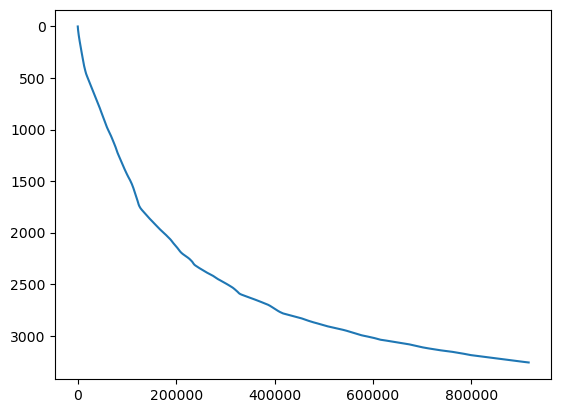

In [99]:
plt.plot(edc_depth_age['ice_age'], edc_depth_age['depth'], label='EDC Ice Age')
plt.gca().invert_yaxis()